In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data
We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.
* Read in the Ecommerce Customers csv file as a DataFrame called customers.

In [2]:
df = pd.read_csv("EcommerceCustomers.csv")

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Handling Null Values

In [6]:
df.isnull().sum() 

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

No Null Values found in the data set.

## Exploratory Data Analysis

In [7]:
sns.set_palette("magma",5)
sns.set_style("whitegrid")

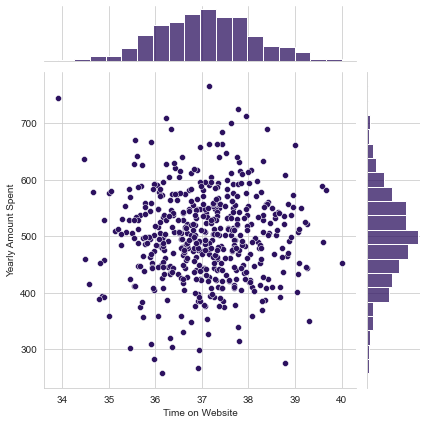

In [8]:
sns.jointplot(x = "Time on Website", y = "Yearly Amount Spent", data=df)

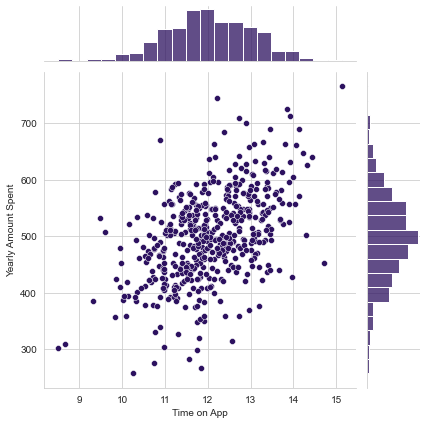

In [9]:
sns.jointplot(x = "Time on App", y = "Yearly Amount Spent", data=df)

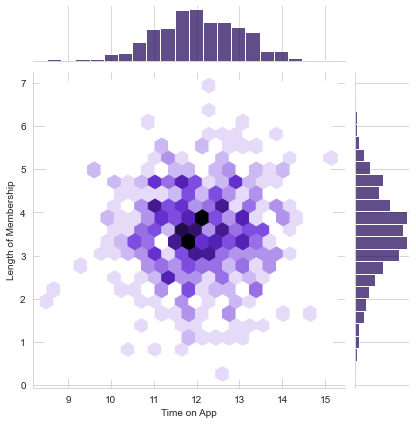

In [10]:
sns.jointplot(x = "Time on App", y = "Length of Membership", data=df, kind = "hex");

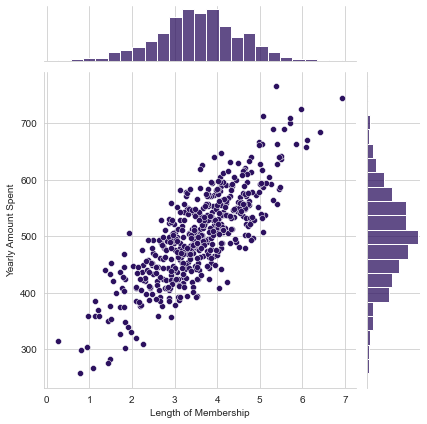

In [11]:
sns.jointplot(data = df, x = "Length of Membership", y = "Yearly Amount Spent", kind = "scatter")

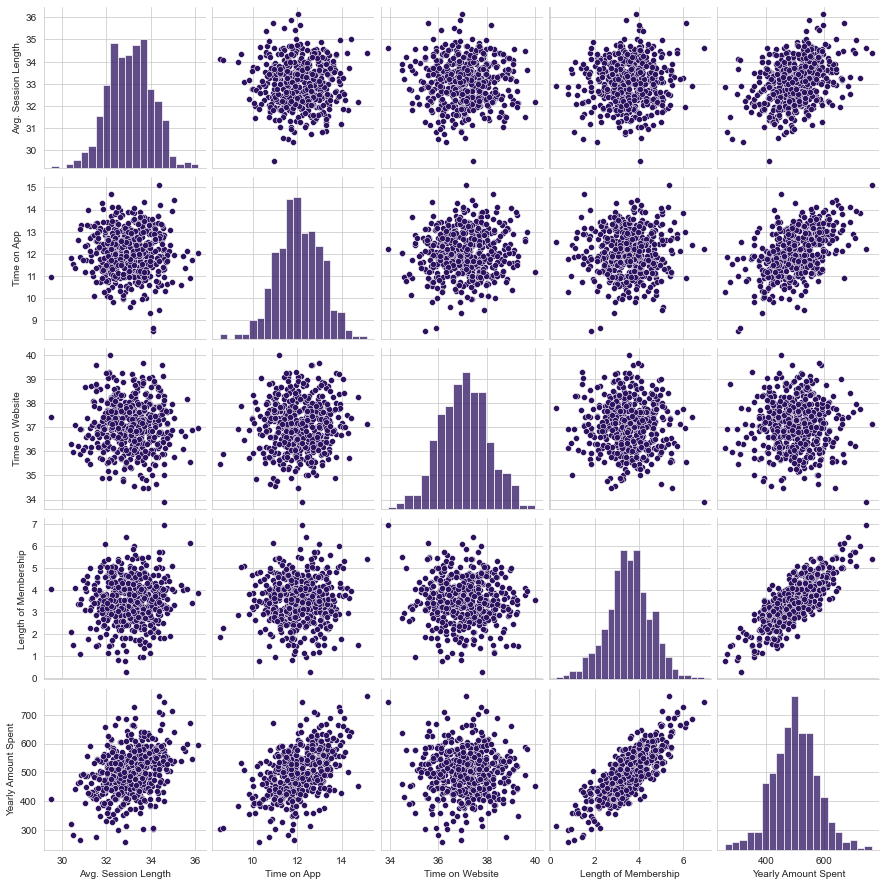

In [12]:
sns.pairplot(df)

In [13]:
df.corr()["Yearly Amount Spent"].sort_values()

Time on Website        -0.002641
Avg. Session Length     0.355088
Time on App             0.499328
Length of Membership    0.809084
Yearly Amount Spent     1.000000
Name: Yearly Amount Spent, dtype: float64

## Getting Data Ready for Training and testing

###  Splitting Data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [16]:
X = df[["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]]
y = df["Yearly Amount Spent"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [18]:
X_train.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
161,33.503705,12.399436,35.012806,0.968622
72,32.386252,10.674653,38.006583,3.401522
246,31.909627,11.347264,36.323652,5.314354
230,32.351478,13.105159,35.574842,3.641497
391,33.481931,11.918670,37.317705,3.336339


In [19]:
X_train.shape

(400, 4)

In [20]:
X_test.shape

(100, 4)

### Evaluation Function

In [21]:
# Importing Libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
# create function which returns MAE, MSE, RMSE
def eval(y_true, y_preds):
    MAE = mean_absolute_error(y_true, y_preds)
    MSE = mean_squared_error(y_true, y_preds)
    RMSE = np.sqrt(mean_squared_error(y_true, y_preds))
    series = pd.Series([MAE, MSE, RMSE])
    index_ = ["MAE", "MSE", "RMSE"]
    series.index = index_
    return series

## MODELLING 

### 1. Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
linear_model = LinearRegression()

In [25]:
# Fit the Data to model
linear_model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred_linear = linear_model.predict(X_test)

In [27]:
len(y_pred_linear)

100

In [28]:
Metric_linear = eval(y_test, y_pred_linear)

In [29]:
Metric_linear

MAE      7.758908
MSE     91.823359
RMSE     9.582451
dtype: float64

### 2. Lasso Regression

In [30]:
from sklearn.linear_model import LassoCV

In [31]:
# Initiate Lasso Model
lasso_model = LassoCV(cv=5, random_state=101, alphas=[0.1,1,5,10,50,100], n_alphas=100)

In [32]:
# Fit the Data to Model
lasso_model.fit(X_train, y_train)

LassoCV(alphas=[0.1, 1, 5, 10, 50, 100], cv=5, random_state=101)

In [33]:
lasso_model.coef_

array([25.93008408, 38.60331549,  0.26054756, 61.37231729])

In [34]:
y_pred_lasso = lasso_model.predict(X_test)

In [35]:
len(y_pred_lasso)

100

In [36]:
Metric_lasso = eval(y_test, y_pred_lasso)

In [37]:
Metric_lasso

MAE      7.722986
MSE     91.745427
RMSE     9.578383
dtype: float64

### 3. Ridge Regression

In [38]:
from sklearn.linear_model import RidgeCV

In [39]:
# Initiate Ridge Model
ridge_model = RidgeCV(cv=5, alphas=[0.1,1,5,10,50,100])

In [40]:
# Fit data to the Model
ridge_model.fit(X_train, y_train)

RidgeCV(alphas=array([  0.1,   1. ,   5. ,  10. ,  50. , 100. ]), cv=5)

In [41]:
ridge_model.coef_

array([26.02308095, 38.6989844 ,  0.35663487, 61.45731836])

In [42]:
y_pred_ridge = ridge_model.predict(X_test)

In [43]:
len(y_pred_ridge)

100

In [44]:
Metric_ridge = eval(y_test, y_pred_ridge)

In [45]:
Metric_ridge

MAE      7.755430
MSE     91.817512
RMSE     9.582145
dtype: float64

### 4. Elastic Net 

In [46]:
from sklearn.linear_model import ElasticNet

In [47]:
# Initiate the model
elastic_model = ElasticNet()

In [48]:
# Create Param Grid for GridSearchCV
param_grid = {"alpha" : [0.1,1,5,10,50,100],
             "l1_ratio": [.1, .5, .7, .9, .95, .99, 1]}

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
# Use GridSearchCV to find best parameters
grid_model = GridSearchCV(estimator=elastic_model, param_grid=param_grid,
                         n_jobs = -1, cv = 5, scoring = "neg_mean_squared_error",
                         verbose=1)

In [51]:
# Fit data to the best model
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [52]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

In [53]:
y_pred_elastic = grid_model.predict(X_test)

In [54]:
len(y_pred_elastic)

100

In [55]:
Metric_elastic_net = eval(y_test, y_pred_elastic)

In [56]:
Metric_elastic_net

MAE      7.722986
MSE     91.745427
RMSE     9.578383
dtype: float64

## Comparing Models

## Residuals

Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed.**

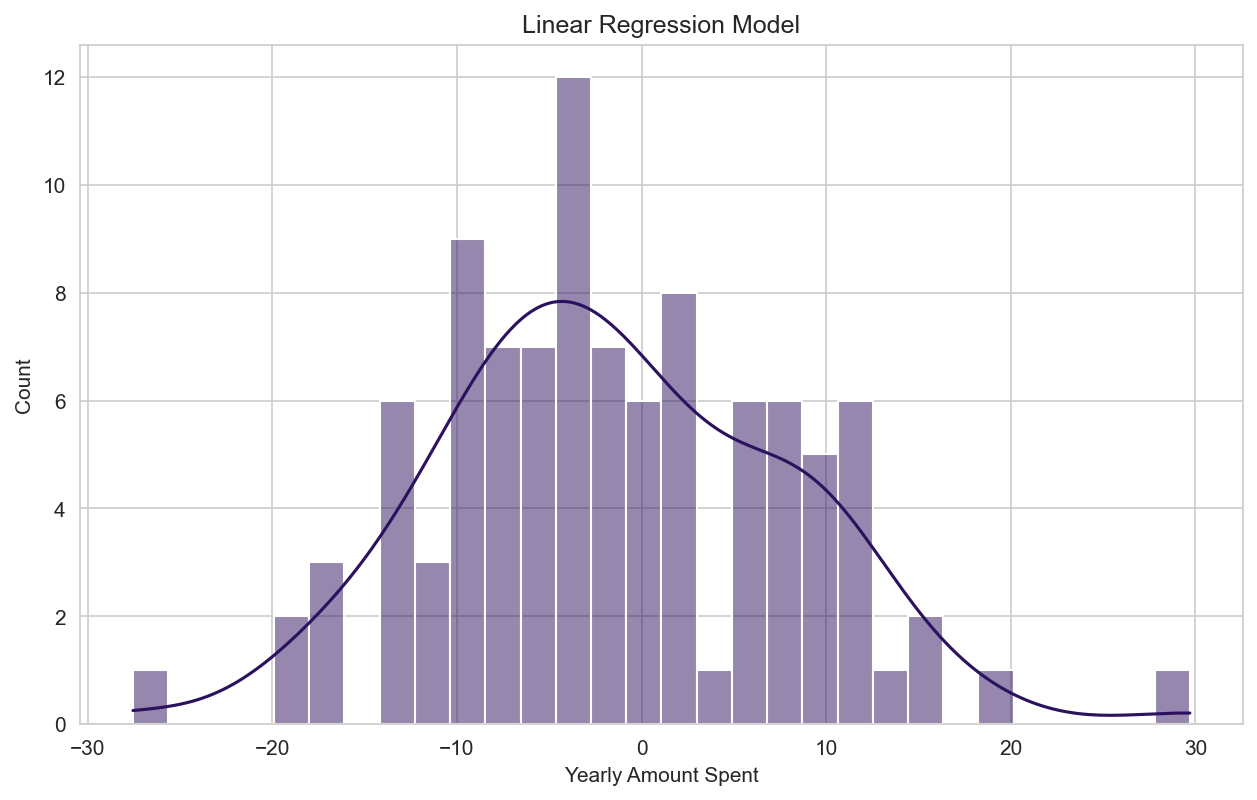

In [81]:
# Linear Regression
plt.figure(figsize= (10,6), dpi=150)
sns.histplot(y_test-y_pred_linear, bins=30, kde=True)
plt.title("Linear Regression Model");

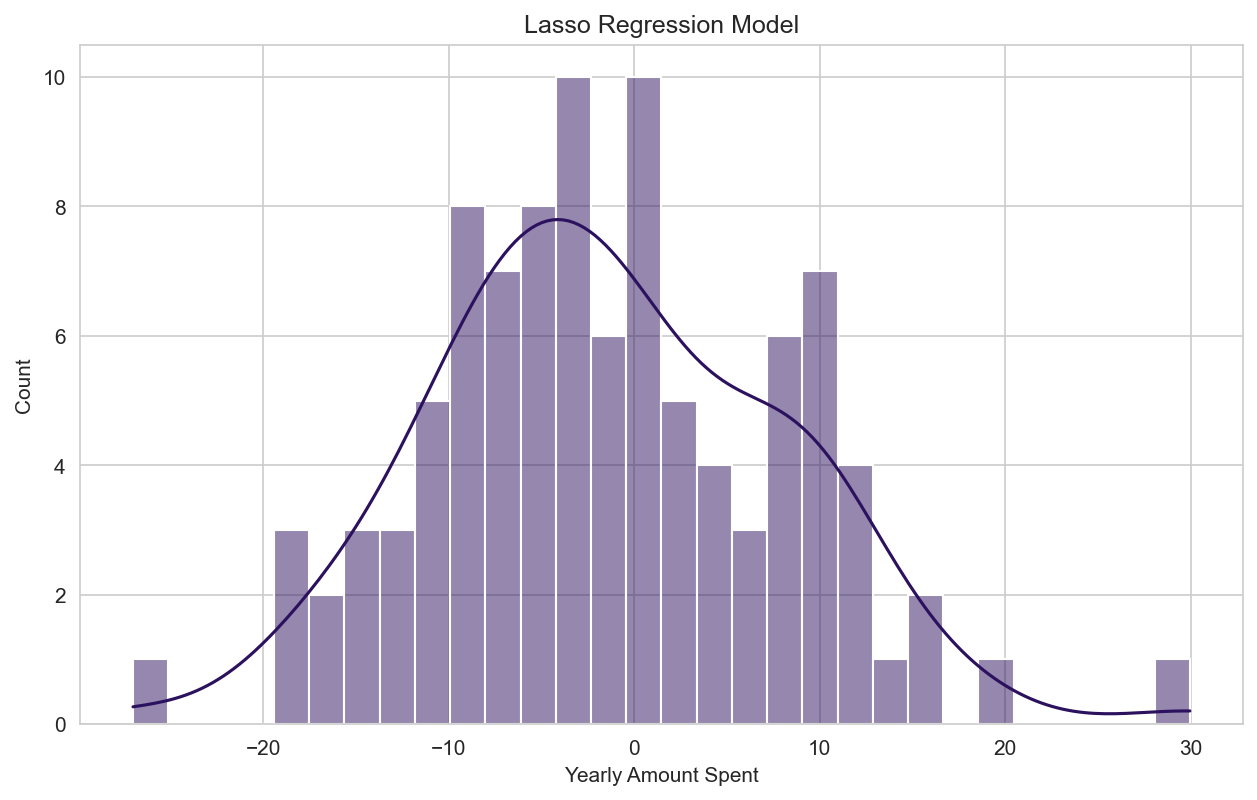

In [58]:
# Lasso Regression Model
plt.figure(figsize= (10,6), dpi=150)
sns.histplot(y_test-y_pred_lasso, bins=30, kde=True)
plt.title("Lasso Regression Model");

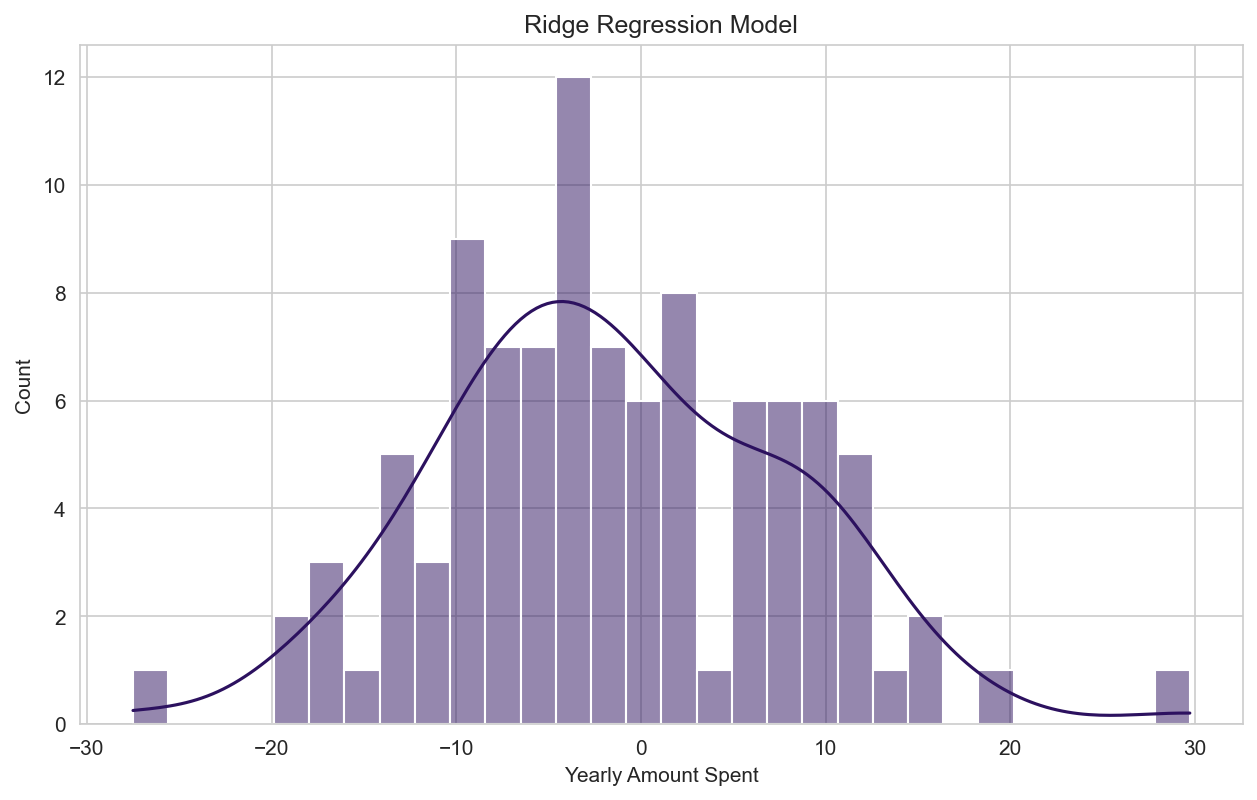

In [59]:
# Ridge Regression Model
plt.figure(figsize= (10,6), dpi=150)
sns.histplot(y_test-y_pred_ridge, bins=30, kde=True)
plt.title("Ridge Regression Model");

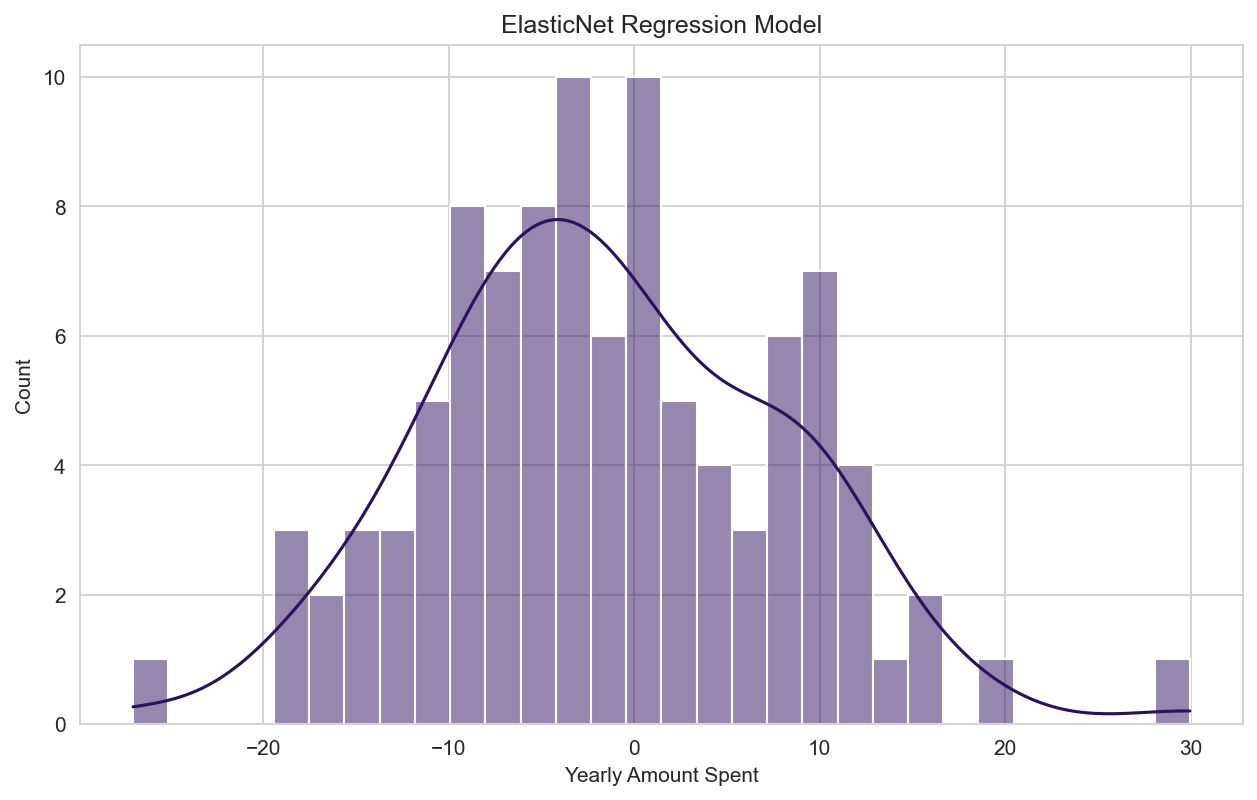

In [60]:
# ElasticNet Regression Model
plt.figure(figsize= (10,6), dpi=150)
sns.histplot(y_test-y_pred_elastic, bins=30, kde=True)
plt.title("ElasticNet Regression Model");

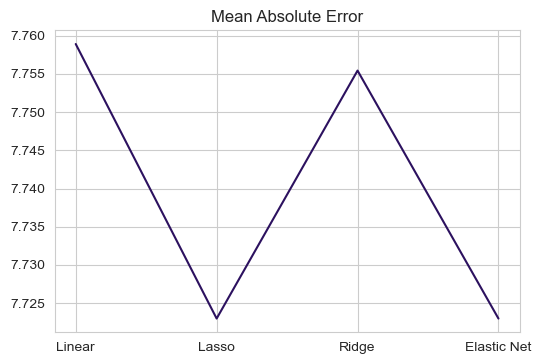

In [73]:
# Line plot for Mean Absolute Error
plt.figure(dpi=100)
sns.lineplot(x = ["Linear", "Lasso", "Ridge", "Elastic Net"], 
             y = [Metric_linear["MAE"], Metric_lasso["MAE"], Metric_ridge["MAE"], Metric_elastic_net["MAE"]],
             markers=["O"])
plt.title("Mean Absolute Error");

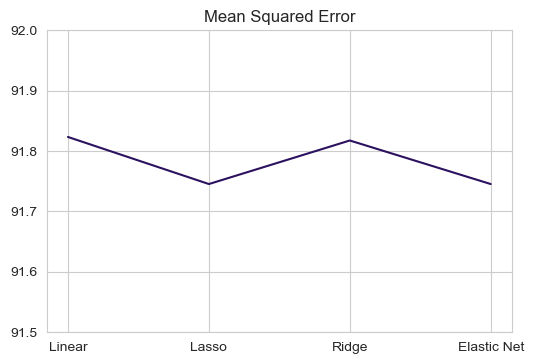

In [69]:
# Line Plot for Mean Squared Error
plt.figure(dpi=100)
sns.lineplot(x = ["Linear", "Lasso", "Ridge", "Elastic Net"], 
             y = [Metric_linear["MSE"], Metric_lasso["MSE"], Metric_ridge["MSE"], Metric_elastic_net["MSE"]],
             markers="o")
plt.ylim([91.5,92])
plt.title("Mean Squared Error");

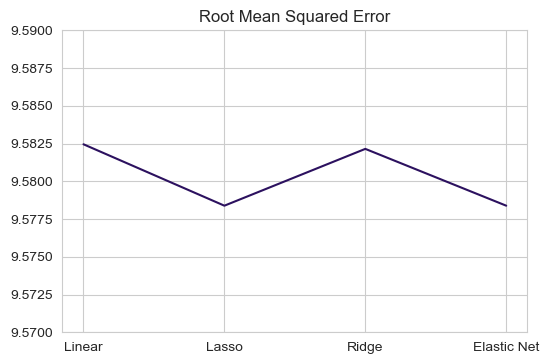

In [74]:
# Line plot for Root Mean Squared Error
plt.figure(dpi=100)
sns.lineplot(x = ["Linear", "Lasso", "Ridge", "Elastic Net"], 
             y = [Metric_linear["RMSE"], Metric_lasso["RMSE"], Metric_ridge["RMSE"], Metric_elastic_net["RMSE"]],
             markers="o")
plt.ylim([9.57,9.59])
plt.title("Root Mean Squared Error");

## Conclusion

By comparing all model, we found out that Lasso and ElasticNet Regression both models works best and we can choose either one of them.

We are taking Lasso model into consideration

In [77]:
coefficients = pd.DataFrame(lasso_model.coef_, X.columns)
coefficients.columns = ['coefficients']
coefficients

,coefficients
Avg. Session Length,25.930084
Time on App,38.603315
Time on Website,0.260548
Length of Membership,61.372317


Interpreting the coefficients:

- Holding all other features fixed, 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.93 yearly dollars spent**.
- Holding all other features fixed, 1 unit increase in **Time on App** is associated with an **increase of 38.60 yearly dollars spent**.
- Holding all other features fixed, 1 unit increase in **Time on Website** is associated with an **increase of 0.26 yearly dollars spent**.
- Holding all other features fixed, 1 unit increase in **Length of Membership** is associated with an **increase of 61.37 yearly dollars spent**.

## Thank You!!